In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve

df = pd.read_excel('Datasets/VeriOnIsleme.xlsx','Sayfa1')

/Users/hakansonmez/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [6]:
df

,Bina Tipi,BA,BEKY,SGE,SGY,ESS
0,Ev,136861,87.0,1075.6,7.9,69
1,Ev,178000,50.8,515.2,2.9,100
2,Ev,156534,58.4,NaN,4.0,75
3,Otel,62370,110.1,517.0,8.3,19
4,Otel,204900,98.9,1540.3,NaN,44
5,Ofis,105505,104.1,902.1,8.5,47
6,Ofis,374958,65.0,1891.7,6.2,80
7,Otel,93150,NaN,672.1,7.2,68
8,Ev,214543,39.3,561.6,2.7,96
9,Ofis,81986,65.4,390.5,4.8,91


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bina Tipi  14 non-null     object 
 1   BA         14 non-null     int64  
 2   BEKY       13 non-null     float64
 3   SGE        13 non-null     float64
 4   SGY        13 non-null     float64
 5   ESS        14 non-null     int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 800.0+ bytes


# Drop Columns That Aren’t Useful

In [4]:
cols = ['Bina Tipi', 'ESS']
df = df.drop(cols, axis=1)

In [5]:
df

,BA,BEKY,SGE,SGY
0,136861,87.0,1075.6,7.9
1,178000,50.8,515.2,2.9
2,156534,58.4,NaN,4.0
3,62370,110.1,517.0,8.3
4,204900,98.9,1540.3,NaN
5,105505,104.1,902.1,8.5
6,374958,65.0,1891.7,6.2
7,93150,NaN,672.1,7.2
8,214543,39.3,561.6,2.7
9,81986,65.4,390.5,4.8


# Take Care of Missing Data

In [8]:
df = pd.read_excel('Datasets/VeriOnIsleme.xlsx','Sayfa1')
df = df.dropna() # Silme fonksiyonu

/Users/hakansonmez/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [9]:
df

,Bina Tipi,BA,BEKY,SGE,SGY,ESS
0,Ev,136861,87.0,1075.6,7.9,69
1,Ev,178000,50.8,515.2,2.9,100
3,Otel,62370,110.1,517.0,8.3,19
5,Ofis,105505,104.1,902.1,8.5,47
6,Ofis,374958,65.0,1891.7,6.2,80
8,Ev,214543,39.3,561.6,2.7,96
9,Ofis,81986,65.4,390.5,4.8,91
10,Ofis,71900,99.3,553.4,7.7,54
11,Ofis,152532,84.1,949.8,6.2,79
12,Otel,190440,113.8,1483.3,7.8,44


In [10]:
df = pd.read_excel('Datasets/VeriOnIsleme.xlsx','Sayfa1')
df.BEKY.fillna(method="ffill")
"""
ffill üst değer
bfill alt değer
df.BEKY.fillna(value= "50")
"""
df

/Users/hakansonmez/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Bina Tipi,BA,BEKY,SGE,SGY,ESS
0,Ev,136861,87.0,1075.6,7.9,69
1,Ev,178000,50.8,515.2,2.9,100
2,Ev,156534,58.4,NaN,4.0,75
3,Otel,62370,110.1,517.0,8.3,19
4,Otel,204900,98.9,1540.3,NaN,44
5,Ofis,105505,104.1,902.1,8.5,47
6,Ofis,374958,65.0,1891.7,6.2,80
7,Otel,93150,NaN,672.1,7.2,68
8,Ev,214543,39.3,561.6,2.7,96
9,Ofis,81986,65.4,390.5,4.8,91


In [11]:
df = pd.read_excel('Datasets/VeriOnIsleme.xlsx','Sayfa1')
df['BEKY'] = df['BEKY'].interpolate()

/Users/hakansonmez/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [13]:
df

,Bina Tipi,BA,BEKY,SGE,SGY,ESS
0,Ev,136861,87.00,1075.6,7.9,69
1,Ev,178000,50.80,515.2,2.9,100
2,Ev,156534,58.40,NaN,4.0,75
3,Otel,62370,110.10,517.0,8.3,19
4,Otel,204900,98.90,1540.3,NaN,44
5,Ofis,105505,104.10,902.1,8.5,47
6,Ofis,374958,65.00,1891.7,6.2,80
7,Otel,93150,52.15,672.1,7.2,68
8,Ev,214543,39.30,561.6,2.7,96
9,Ofis,81986,65.40,390.5,4.8,91


In [14]:
df = df.interpolate()

In [15]:
df

,Bina Tipi,BA,BEKY,SGE,SGY,ESS
0,Ev,136861,87.00,1075.6,7.9,69
1,Ev,178000,50.80,515.2,2.9,100
2,Ev,156534,58.40,516.1,4.0,75
3,Otel,62370,110.10,517.0,8.3,19
4,Otel,204900,98.90,1540.3,8.4,44
5,Ofis,105505,104.10,902.1,8.5,47
6,Ofis,374958,65.00,1891.7,6.2,80
7,Otel,93150,52.15,672.1,7.2,68
8,Ev,214543,39.30,561.6,2.7,96
9,Ofis,81986,65.40,390.5,4.8,91


In [12]:
df = pd.read_excel('Datasets/VeriOnIsleme.xlsx','Sayfa1')
cols = ['Bina Tipi']
df = df.drop(cols, axis=1)
df.mean()

/Users/hakansonmez/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


BA      151493.500000
BEKY        82.576923
SGE        909.069231
SGY          6.315385
ESS         66.857143
dtype: float64

In [13]:
df_mean = df.fillna(df.mean())

In [14]:
df_mean

,BA,BEKY,SGE,SGY,ESS
0,136861,87.000000,1075.600000,7.900000,69
1,178000,50.800000,515.200000,2.900000,100
2,156534,58.400000,909.069231,4.000000,75
3,62370,110.100000,517.000000,8.300000,19
4,204900,98.900000,1540.300000,6.315385,44
5,105505,104.100000,902.100000,8.500000,47
6,374958,65.000000,1891.700000,6.200000,80
7,93150,82.576923,672.100000,7.200000,68
8,214543,39.300000,561.600000,2.700000,96
9,81986,65.400000,390.500000,4.800000,91


In [15]:
df = pd.read_excel('Datasets/VeriOnIsleme.xlsx','Sayfa1')
cols = ['Bina Tipi']
df = df.drop(cols, axis=1)
df.median()

/Users/hakansonmez/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


BA      144696.5
BEKY        87.0
SGE        765.3
SGY          7.2
ESS         69.5
dtype: float64

In [16]:
df_median = df.fillna(df.median()) # veya df.fillna(df.mode()[1])
df_median

,BA,BEKY,SGE,SGY,ESS
0,136861,87.0,1075.6,7.9,69
1,178000,50.8,515.2,2.9,100
2,156534,58.4,765.3,4.0,75
3,62370,110.1,517.0,8.3,19
4,204900,98.9,1540.3,7.2,44
5,105505,104.1,902.1,8.5,47
6,374958,65.0,1891.7,6.2,80
7,93150,87.0,672.1,7.2,68
8,214543,39.3,561.6,2.7,96
9,81986,65.4,390.5,4.8,91


# One-hot encoding

In [17]:
df = pd.read_excel('Datasets/VeriOnIsleme_2.xlsx','Sayfa1')
df

/Users/hakansonmez/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Bina Tipi,BA,BEKY,SGE,SGY,ESS
0,Ev,136861,87.0,1075.6,7.9,69
1,Ev,178000,50.8,515.2,2.9,100
2,Ev,156534,58.4,909.0,4.0,75
3,Otel,62370,110.1,517.0,8.3,19
4,Otel,204900,98.9,1540.3,6.3,44
5,Ofis,105505,104.1,902.1,8.5,47
6,Ofis,374958,65.0,1891.7,6.2,80
7,Otel,93150,82.5,672.1,7.2,68
8,Ev,214543,39.3,561.6,2.7,96
9,Ofis,81986,65.4,390.5,4.8,91


In [18]:
df_encoded = pd.get_dummies(df["Bina Tipi"])
df_encoded.head()

,Ev,Ofis,Otel
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1


In [19]:
df = pd.read_excel('Datasets/VeriOnIsleme_2.xlsx','Sayfa1')
df["Bina Tipi"] = df["Bina Tipi"].astype('category')
df.dtypes

/Users/hakansonmez/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Bina Tipi    category
BA              int64
BEKY          float64
SGE           float64
SGY           float64
ESS             int64
dtype: object

In [20]:
df["Bina Tipi"] = df["Bina Tipi"].cat.codes
df.head()

,Bina Tipi,BA,BEKY,SGE,SGY,ESS
0,0,136861,87.0,1075.6,7.9,69
1,0,178000,50.8,515.2,2.9,100
2,0,156534,58.4,909.0,4.0,75
3,2,62370,110.1,517.0,8.3,19
4,2,204900,98.9,1540.3,6.3,44


In [21]:
X = df.values
y = df['ESS'].values

In [22]:
#c= 5/9*(f-32)
c=lambda f:5/9 * (f-32)

In [23]:
veri=[(i, c(i)) for i in range(0,101,10)]

In [24]:
veri

[(0, -17.77777777777778),
 (10, -12.222222222222223),
 (20, -6.666666666666667),
 (30, -1.1111111111111112),
 (40, 4.444444444444445),
 (50, 10.0),
 (60, 15.555555555555557),
 (70, 21.11111111111111),
 (80, 26.666666666666668),
 (90, 32.22222222222222),
 (100, 37.77777777777778)]

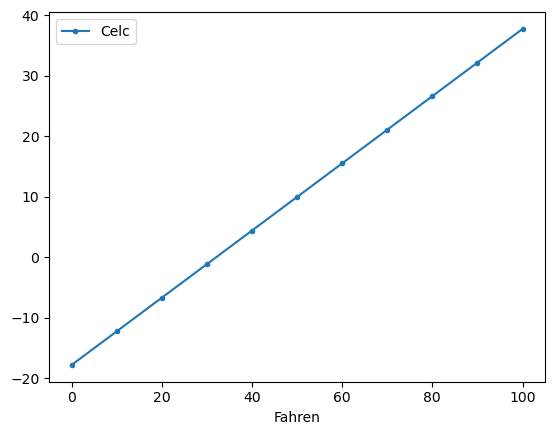

In [25]:
df=pd.DataFrame(veri, columns=["Fahren", "Celc"])
df.plot(x='Fahren', y="Celc", style='.-');

In [26]:
df

,Fahren,Celc
0,0,-17.777778
1,10,-12.222222
2,20,-6.666667
3,30,-1.111111
4,40,4.444444
5,50,10.000000
6,60,15.555556
7,70,21.111111
8,80,26.666667
9,90,32.222222


In [27]:
df=pd.read_csv('Datasets/regres.csv')

In [28]:
df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [29]:
df.columns=['Tarih','Sıcaklık', 'Anomali']

In [30]:
df.Tarih.dtype

dtype('int64')

In [31]:
df.Tarih = df.Tarih.floordiv(100)

In [35]:
pd.set_option('display.precision', 2)

In [36]:
df.Sıcaklık.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Sıcaklık, dtype: float64

In [37]:
from scipy import stats

In [38]:
df.head(3)

,Tarih,Sıcaklık,Anomali
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [41]:
regresyon = stats.linregress(x=df.Tarih, y=df.Sıcaklık)

In [42]:
regresyon.slope

0.014771361132966163

In [43]:
regresyon.intercept

8.694993233674289

In [44]:
regresyon.slope*2023+regresyon.intercept

38.57745680566484

In [45]:
df.describe()

,Tarih,Sıcaklık,Anomali
count,124.00,124.00,124.00
mean,1956.50,37.60,0.20
std,35.94,4.54,4.54
min,1895.00,26.10,-11.30
25%,1925.75,34.58,-2.82
50%,1956.50,37.60,0.20
75%,1987.25,40.60,3.20
max,2018.00,47.60,10.20


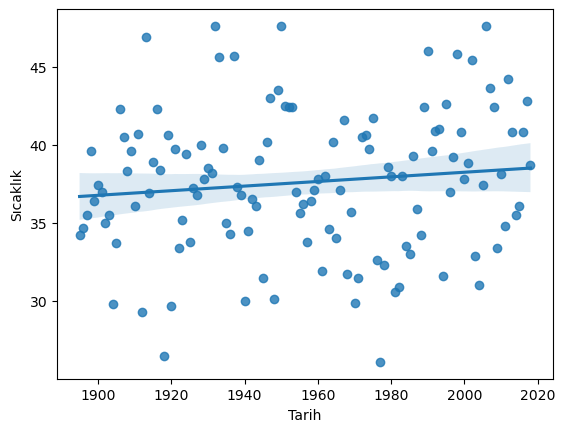

In [46]:
import seaborn as sns
axes = sns.regplot(x=df.Tarih, y=df.Sıcaklık)

In [51]:
yıl = 2023
m = regresyon.slope
b = regresyon.intercept
x = m * yıl + b
while x < 40:
    yıl += 1
    x = m * yıl + b

In [52]:
yıl

2120